In [1]:
import pandas as pd

In [20]:
filename = "network_usage.csv"
time_column = "t_parsed"
network_usage_column = "cumulative_parsed"
hostname = "L02197.DIRECTORY.INTRA"

In [21]:
df = pd.read_csv(filename)
df[time_column] = pd.to_datetime(df[time_column])
df = df.loc[df["direction"] == "<="]
df = df.loc[df["host/name"] == hostname]
df

,Unnamed: 0,#,host/name,direction,2s,10s,40s,cumulative,t,cumulative_parsed,t_parsed
1,1,NaN,L02197.DIRECTORY.INTRA,<=,660b,660b,660b,165B,15-21-53.346555613,165,1900-01-01 15:21:53.346555613
3,3,NaN,L02197.DIRECTORY.INTRA,<=,5.06Kb,5.06Kb,5.06Kb,1.27KB,15-26-03.120180925,1270,1900-01-01 15:26:03.120180925
5,5,NaN,L02197.DIRECTORY.INTRA,<=,1.69Kb,1.69Kb,1.69Kb,432B,15-25-04.881277767,432,1900-01-01 15:25:04.881277767
7,7,NaN,L02197.DIRECTORY.INTRA,<=,292b,292b,292b,73B,15-25-04.881277767,73,1900-01-01 15:25:04.881277767
11,11,NaN,L02197.DIRECTORY.INTRA,<=,3.92Kb,3.92Kb,3.92Kb,0.98KB,15-21-03.894581807,980,1900-01-01 15:21:03.894581807
...,...,...,...,...,...,...,...,...,...,...,...
373,373,NaN,L02197.DIRECTORY.INTRA,<=,5.06Kb,5.06Kb,5.06Kb,1.27KB,15-21-40.558501183,1270,1900-01-01 15:21:40.558501183
375,375,NaN,L02197.DIRECTORY.INTRA,<=,5.06Kb,5.06Kb,5.06Kb,1.27KB,15-21-37.367777289,1270,1900-01-01 15:21:37.367777289
377,377,NaN,L02197.DIRECTORY.INTRA,<=,316b,316b,316b,79B,15-21-37.367777289,79,1900-01-01 15:21:37.367777289
379,379,NaN,L02197.DIRECTORY.INTRA,<=,2.44Kb,2.44Kb,2.44Kb,624B,15-20-49.852674586,624,1900-01-01 15:20:49.852674586


In [42]:
df = df.groupby(['t_parsed']).agg({'cumulative_parsed': 'sum'})
df

,cumulative_parsed
t_parsed,
1900-01-01 15:17:19.226211993,595
1900-01-01 15:17:27.790783493,864
1900-01-01 15:17:30.026684014,864
1900-01-01 15:17:33.234626489,504
1900-01-01 15:17:36.382279403,432
...,...
1900-01-01 15:26:08.477349232,432
1900-01-01 15:26:10.674035074,864
1900-01-01 15:26:13.882103307,504


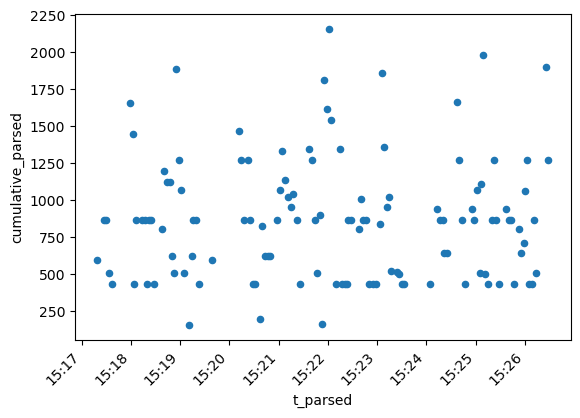

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

df.reset_index().plot.scatter(x=time_column, y=network_usage_column, ax=ax)
dateformat = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(dateformat)
fig.autofmt_xdate(rotation=45)